In [1]:
import cv2
import time
import numpy as np
import src.eventdenoisor as edn
import src.eventdetector as edt

from evtool.dvs import DvsFile
from evtool.utils import Player

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from IPython import display
%matplotlib inline

In [7]:
# nThres, sigmaT, sigmaS
data = DvsFile.load('./data/demo/aedat/s04_v05_c001.aedat4')
model = edn.reclusive_event_denoisor(data['size'][0], data['size'][1], 
                                     (1.2, 1., 0.7))

idx = data['events'].hotpixel(data['size'], thres=1000)
data['events'] = data['events'][idx]

idx = model.run(data['events'].ts, data['events'].x, data['events'].y, data['events'].p)
data['events'] = data['events'][idx]

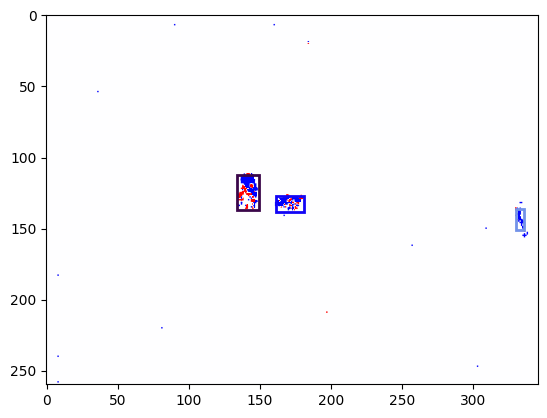

In [9]:
fig, ax = plt.subplots()
detector = edt.selective_detector(data['size'][0], data['size'][1], 0.7)

for ts, ev in data['events'].slice('25ms'):
    ax.cla()
    display.clear_output(wait=True)
    ax.imshow(ev.project(data['size']), vmin=-1, vmax=1, cmap=plt.set_cmap('bwr'))

    # st = time.time()
    contours = detector.process(ev.ts, ev.x, ev.y, ev.p)
    # print(time.time() - st)

    for c in contours:
        x, y, w, h = c
        if (w < 5 and h < 5): continue
        color = np.random.rand(3)
        rect = Rectangle((x, y), w, h, edgecolor=color, facecolor='none', linewidth=2)
        ax.add_patch(rect)

    display.display(plt.gcf())
    time.sleep(1)